In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import minimize
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)

def vector_grad(f, x, args):
    return np.array([partial_derivative(f, var=i, point=x) for i in range(args)])

def norm(a):
    return np.sum(a ** 2) ** 0.5


In [3]:
def gradient_descent(f, args=2, eps=0.1, alpha=2, x=None):
    if not x:
        x = [0] * args
    grad = vector_grad(f, x, args)
    while norm(grad) > eps:
        if f(*(x - alpha * grad)) < f(*x):
            x -= alpha * grad
        else:
            alpha /= 2
        grad = vector_grad(f, x, args)
    return x, f(*x)


def fastest_descent(f, args=2, eps=0.1, alpha=2, x=None):
    if not x:
        x = [0] * args
    
    def F(a):
        return f(*(x - a * grad))
    
    grad = vector_grad(f, x, args)
    while norm(grad) > eps:
        
        a = minimize(F, 0, bounds=[[0, 5]])['x'][0]
        
        x -= a * grad
        grad = vector_grad(f, x, args)
        
    return x, f(*x)

def pattern_search(f, args=2, eps=0.1, x=None, h=0.5, lambd=0.1):
    if not x:
        x = [0] * args

    x_cur = x
    steps = np.ones(args) * h

    while np.all(steps >= eps):

        flag_no_changes = True

        for i in range(args):
            cur_step = np.zeros(args)
            cur_step[i] = steps[i]

            if f(*x_cur) > f(*(x_cur + cur_step)):
                x_cur += cur_step
                flag_no_changes = False
                continue

            if f(*x_cur) > f(*(x_cur - cur_step)):
                x_cur -= cur_step
                flag_no_changes = False
                continue

        if flag_no_changes:
            steps = steps / 10
        else:
            x_tmp = x_cur - lambd * (x_cur - x)
            x = x_cur
            x_cur = x_tmp
    return x_cur, f(*x_cur)


In [4]:
def f(x1, x2):
    return x1 ** 2 + x2 ** 2 - 2 * x1


In [5]:
dot = [1, 1]
grad = gradient_descent(f, x=dot)
pattern = pattern_search(f, x=dot)
fast = fastest_descent(f, x=dot)
fast


(array([1.0000010e+00, 1.0071752e-06]), -0.9999999999979858)

In [6]:
def plot_3d(grad, pattern, fast, POV=[45, 40]):
    solutions = np.array([grad[0], pattern[0], fast[0]], dtype=float)
    min_x, min_y = np.min(solutions, axis=0) - 10
    max_x, max_y = np.min(solutions, axis=0) + 10
    
    fig = plt.figure(figsize=(20, 12))
    ax = plt.axes(projection='3d')
    
    X, Y = np.meshgrid(np.linspace(min_x, max_x, 1000), np.linspace(min_y, max_y, 1000))
    Z = f(X, Y)
    
    ax.plot_wireframe(X, Y, Z, color ='green', label='Surface of function f(x)')
    ax.scatter(grad[0][0], grad[0][1], grad[1], s=200, color='red', label='Gradient descent solution')
    ax.scatter(fast[0][0], fast[0][1], fast[1], s=200, color='blue', label='Fastest descent solution')
    ax.scatter(pattern[0][0], pattern[0][1], pattern[1], s=200, color='orange', label='Hook-geeves solution')
    ax.view_init(POV[0], POV[1])
    ax.legend(prop={'size': 15})
    ax.set_title('Surface of function f(x)', fontsize=20)
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    ax.set_zlabel('f(x)', fontsize=20)
    plt.show();

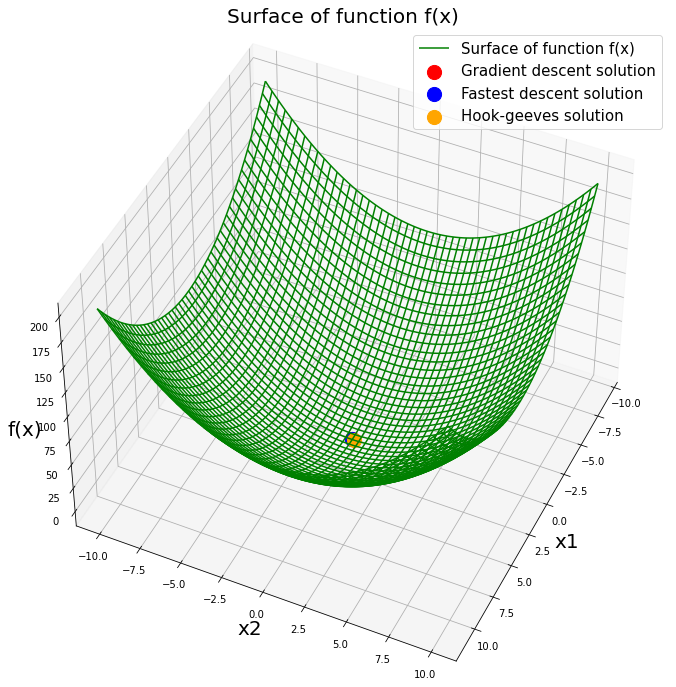

In [7]:
plot_3d(grad, pattern, fast, POV=[45, 25])